## The Mood of the News

In [2]:
#Dependencies
import pandas as pd
import tweepy
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# Target Search Term
target_user = "@BBCNews"
#"@CNN", "@CBSNews","@FoxNews", "@nytimes"

# Array to hold sentiments
sentiments = []

# Convert tweet timestamps to datetime objects that can be manipulated by Python
converted_timestamps = []

# Variable for holding the oldest tweet
oldest_tweet = None

# Variables for holding sentiments
compound_list = []

# Counter
counter = 1


# Get all tweets from home feed
public_tweets = api.user_timeline(target_user, count=100, result_type="recent", max_id=oldest_tweet)

# Loop through all tweets
for tweet in public_tweets:
            
    #Convert the raw tweet time to correct datetime stamp.
    converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")

    # Run Vader Analysis on each tweet
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    
    # Add sentiments for each tweet into an array
    sentiments.append({"News Source": target_user,
                       "Date": converted_time, 
                        "Compound": compound,
                        "Tweets Ago": counter})
    # Add to counter 
    counter = counter + 1

In [10]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head(50)

,Compound,Date,News Source,Tweets Ago
0,0.5994,2017-11-29 22:39:16+00:00,@BBCNews,1
1,-0.4404,2017-11-29 22:33:22+00:00,@BBCNews,2
2,0.0000,2017-11-29 22:33:20+00:00,@BBCNews,3
3,-0.1027,2017-11-29 22:33:18+00:00,@BBCNews,4
4,0.0000,2017-11-29 22:21:33+00:00,@BBCNews,5
5,-0.7906,2017-11-29 22:21:27+00:00,@BBCNews,6
6,0.4019,2017-11-29 22:01:31+00:00,@BBCNews,7
7,-0.6705,2017-11-29 21:45:23+00:00,@BBCNews,8
8,-0.1027,2017-11-29 21:45:21+00:00,@BBCNews,9
9,-0.5610,2017-11-29 21:15:21+00:00,@BBCNews,10


In [17]:
#Need to put tweet in df with time stamp and the compound sentiment analysis. 
news_sentiments = pd.DataFrame(sentiments_df, columns= ["News Source", "Date", "Compound","Tweets Ago"])
news_sentiments.head(50)

,News Source,Date,Compound,Tweets Ago
0,@BBCNews,2017-11-29 22:39:16+00:00,0.5994,1
1,@BBCNews,2017-11-29 22:33:22+00:00,-0.4404,2
2,@BBCNews,2017-11-29 22:33:20+00:00,0.0000,3
3,@BBCNews,2017-11-29 22:33:18+00:00,-0.1027,4
4,@BBCNews,2017-11-29 22:21:33+00:00,0.0000,5
5,@BBCNews,2017-11-29 22:21:27+00:00,-0.7906,6
6,@BBCNews,2017-11-29 22:01:31+00:00,0.4019,7
7,@BBCNews,2017-11-29 21:45:23+00:00,-0.6705,8
8,@BBCNews,2017-11-29 21:45:21+00:00,-0.1027,9
9,@BBCNews,2017-11-29 21:15:21+00:00,-0.5610,10


In [18]:
news_sentiments.to_csv('news_sentiments_100.csv', encoding='utf-8', index=False)

In [13]:
news_sentiments.count()

News Source    100
Date           100
Compound       100
Tweets Ago     100
dtype: int64

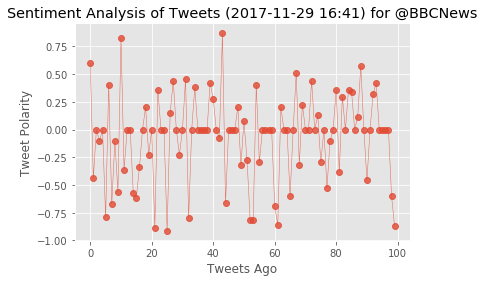

In [16]:
#Graph the 100 tweets from each news source with a timestamp "Tweets Ago". 

plt.plot(np.arange(len(sentiments_df["Compound"])),
         sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()